# Analyzing metric on State of the Art Models

In this experiment, we evaluated the performance of leading large language models, specifically ChatGPT and Claude, in comparison to Gemma. Both ChatGPT and Claude are general-purpose conversational models with extensive capabilities, which generally enhances their performance in zero-shot generation tasks. In contrast, Gemma may be tailored or designed for specific applications, potentially limiting its effectiveness in this context. The results indicate that Claude achieved the highest score of 52.7%, with ChatGPT following closely with a score of 48.1%. In comparison, Gemma's performance was notably lower, with a score of 30.8%.

#### Imports

In [5]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [6]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
chatgpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Chat_GPT_results - Sheet1.csv")
claude = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Claude_results - Sheet1.csv")

In [7]:
gemma_llm = gemma.loc[gemma["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Russell_Peters", "Ali_Wong", "Hasan_Minhaj"])]

In [8]:
llm_gt = ground_truth.loc[ground_truth["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Russell_Peters", "Ali_Wong", "Hasan_Minhaj"])]

Experiment

In [9]:
gemma_llm_metric = bipartite_metric(gemma_llm, llm_gt)
gemma_llm_metric.mean()

/tmp/ipykernel_3070071/1130048052.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gemma_llm_metric.mean()


score    30.884762
dtype: float64

In [10]:
chatgpt_metric = bipartite_metric(chatgpt, llm_gt)
chatgpt_metric.mean()

/tmp/ipykernel_3070071/368568757.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chatgpt_metric.mean()


score    48.169286
dtype: float64

In [11]:
claude_metric = bipartite_metric(claude, llm_gt)
claude_metric.mean()

/tmp/ipykernel_3070071/2181721727.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  claude_metric.mean()


score    52.756667
dtype: float64

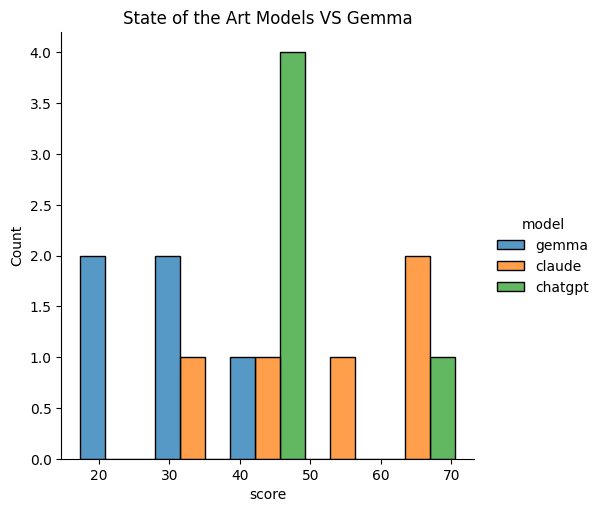

In [12]:
gemma = gemma_llm_metric.assign(model = "gemma")
claude = claude_metric.assign(model="claude") 
chatgpt = chatgpt_metric.assign(model="chatgpt")
df = pd.concat([gemma, claude, chatgpt]).reset_index(drop=True)
sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plt.title("State of the Art Models VS Gemma")
plt.show()